### Predicting the Movement of Sliver Stock Price

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Silver_HistoricalData_1669917710205.csv')

In [6]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/30/2022,21.781,62564.0,21.415,22.410,21.355
1,11/29/2022,21.436,45726.0,21.130,21.635,21.060
2,11/28/2022,21.125,57501.0,21.640,21.815,21.045
3,11/25/2022,21.609,30139.0,21.785,21.880,21.355
4,11/23/2022,21.526,20315.0,21.260,21.780,21.095


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1250 non-null   float64
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [8]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,1259.000000,1250.00000,1259.000000,1259.000000,1259.000000
mean,19.806008,62633.14320,19.820060,20.047642,19.558702
std,4.329010,37798.69542,4.339982,4.426561,4.227206
min,11.772000,1.00000,11.975000,12.330000,11.640000
25%,16.133000,42252.75000,16.140000,16.257500,15.992500
50%,18.168000,60558.50000,18.160000,18.400000,17.975000
75%,23.998000,77649.75000,24.020000,24.305000,23.617500
max,29.418000,347002.00000,29.235000,30.350000,28.300000


#### Lets plot the stock data

Text(0.5, 1.0, 'Price per day from 01-12-2017 for Silver in $')

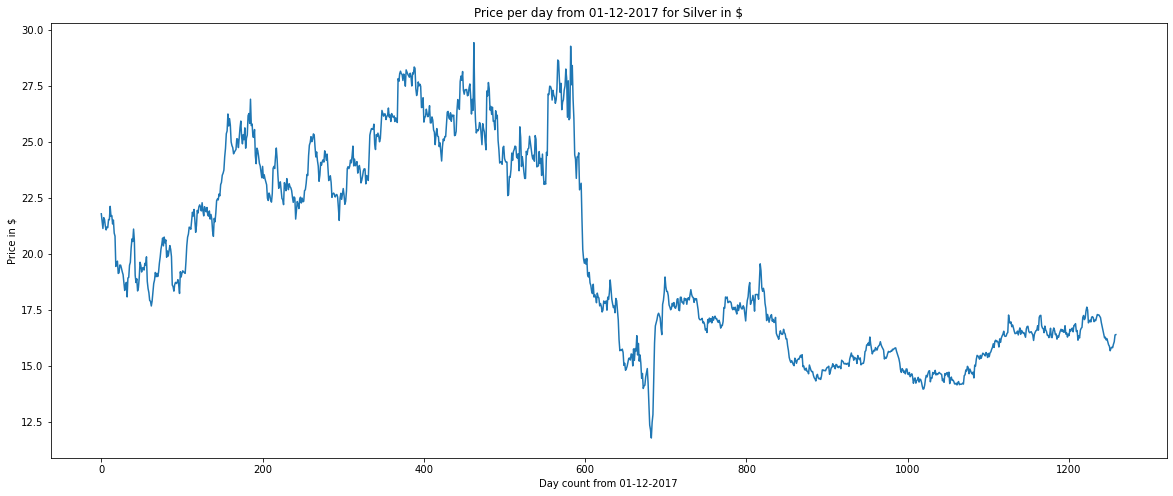

In [21]:
plt.figure(figsize=(20,8))
plt.plot(df['Close/Last'])
plt.ylabel('Price in $')
plt.xlabel('Day count from 01-12-2017')
plt.title('Price per day from 01-12-2017 for Silver in $')

#### Scaling the data as LSTM's are sensitive to numeric values, this is a good paractice to normalise values before applying any ML algorithm

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
df_1 = df['Close/Last']

In [15]:
df_1.head()

0    21.781
1    21.436
2    21.125
3    21.609
4    21.526
Name: Close/Last, dtype: float64

In [16]:
df_1

0       21.781
1       21.436
2       21.125
3       21.609
4       21.526
         ...  
1254    15.802
1255    15.955
1256    16.068
1257    16.373
1258    16.388
Name: Close/Last, Length: 1259, dtype: float64

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1,1))

In [19]:
df_1

array([[0.5672107 ],
       [0.54765953],
       [0.53003514],
       ...,
       [0.24345461],
       [0.26073898],
       [0.26158903]])

In [20]:
df_1.shape

(1259, 1)

#### Now Since we are working on time series data its always we have to split sequentially for Training and Testing

In [22]:
#Lets set the train size and test size and do the split
train_size=int(len(df_1)*0.80)  #Split is 70% train and 30% test
test_size=len(df_1)-train_size

In [23]:
train_data, test_data=df_1[0:train_size,:], df_1[train_size:len(df_1),:1]

In [26]:
train_size, train_data, test_size, test_data

(1007,
 array([[0.5672107 ],
        [0.54765953],
        [0.53003514],
        ...,
        [0.15924289],
        [0.16252975],
        [0.15453927]]),
 252,
 array([[0.13855831],
        [0.14904228],
        [0.15204579],
        [0.13878499],
        [0.14569874],
        [0.14705882],
        [0.15346254],
        [0.14150516],
        [0.14909895],
        [0.14790887],
        [0.14116514],
        [0.13079451],
        [0.12354075],
        [0.12478749],
        [0.13419472],
        [0.15023235],
        [0.15850618],
        [0.15459594],
        [0.16292644],
        [0.16910348],
        [0.17029355],
        [0.14224187],
        [0.15244248],
        [0.15130908],
        [0.16592996],
        [0.16196305],
        [0.16456987],
        [0.17120027],
        [0.15952624],
        [0.16309645],
        [0.16048963],
        [0.16383316],
        [0.16598663],
        [0.16343647],
        [0.1622464 ],
        [0.16060297],
        [0.14473535],
        [0.14892894],
    

#### Convert to the dataset matrix

In [27]:
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  #i=0,1,2,3,4,5
        data_X.append(a)
        data_Y.append(dataset[i+time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [28]:
# Reshape into X=t, t+1, t+2 and Y=t+4
time_step = 10
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [29]:
print(X_train)

[[0.5672107  0.54765953 0.53003514 ... 0.53405871 0.53224527 0.55264649]
 [0.54765953 0.53003514 0.55746345 ... 0.53224527 0.55264649 0.55230647]
 [0.53003514 0.55746345 0.55275983 ... 0.55264649 0.55230647 0.58602516]
 ...
 [0.1755072  0.17261702 0.16598663 ... 0.16184971 0.1605463  0.16570328]
 [0.17261702 0.16598663 0.16927349 ... 0.1605463  0.16570328 0.15510597]
 [0.16598663 0.16927349 0.16235974 ... 0.16570328 0.15510597 0.15924289]]


In [30]:
print(Y_train)

[0.55230647 0.58602516 0.56075031 0.56273376 0.54148249 0.55139975
 0.5183611  0.51071064 0.43397937 0.44327326 0.44741018 0.41635498
 0.41794174 0.43760626 0.4371529  0.4293891  0.42032189 0.41335147
 0.39198685 0.37328573 0.38694322 0.39368695 0.35696475 0.4049643
 0.4060977  0.43720957 0.44446333 0.48073218 0.50368355 0.49710983
 0.52856171 0.49965998 0.41182138 0.39329026 0.40281084 0.37203899
 0.38014281 0.40451094 0.44457667 0.43681288 0.41998187 0.42989913
 0.43120254 0.42485549 0.44185651 0.43743625 0.4583475  0.39640712
 0.37798935 0.36767539 0.34772753 0.34619744 0.33401337 0.34625411
 0.36920549 0.39091012 0.39969398 0.41873512 0.40813782 0.41646832
 0.40847784 0.41958518 0.44185651 0.45749745 0.477842   0.48962938
 0.50583702 0.48605916 0.5083305  0.49359628 0.50107673 0.45732744
 0.47319506 0.46027428 0.47415845 0.48679587 0.47744531 0.45880086
 0.38694322 0.38325966 0.37152896 0.38790661 0.39368695 0.39079678
 0.39334693 0.40054403 0.3866032  0.36569194 0.42060524 0.40723

In [31]:
len(X_train), len(Y_train)

(996, 996)

In [32]:
len(X_test), len(Y_test)

(241, 241)

In [33]:
X_train.shape, Y_train.shape

((996, 10), (996,))